<a href="https://colab.research.google.com/github/KyungdaePark/HongongMachine/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42
)

In [ ]:
# 사이킷런의 변환기
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(include_bias=False) 
poly.fit([[2,3]]) #input만 필요
print(poly.transform([[2,3]]))
# 2 제곱 3 제곱 추가하고 2*3 추가
# 무게 = a*길이 + b*높이 + c*두께

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
print(train_poly)

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [ ]:
print(train_input)

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]


In [ ]:
# 왜 9개인지 확인하는 방법 : 각 9개의 특성이 어떤 조합으로 만들어졌는지 확인하기
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
# poly를 이용해 훈련하기 : 우선 linear로 해보자
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594132


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [ ]:
print(lr.score(test_poly, test_target))

-144.40579242335605


In [ ]:
# 과대적합을 줄이는 법 : 규제 (regularization)
# 그전에 정규화 먼저 (표준편차 같은거)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
print(train_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]


In [ ]:
print(test_scaled)

[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0.81327179
  -0.81584326 -0.81548696 -0.79980303 -0.80545985 -0.80768359 -0.80657966
  -0.80223729 -0.79049072 -0.7959136  -0.79756241 -0.7954801  -0.78971903
  -0.78033726]
 [-1.1967077  -0.98223359 -0.85919166 -1.06961356 -0.99185789 -0.95563426
  -0.92268296 -0.88613609 -0.84269005 -0.95543049 -0.92180981 -0.91161782
  -0.8899864  -0.87889323 -0.86304299 -0.85973625 -0.84769699 -0.83072978
  -0.80943128 -0.86077079 -0.84687971 -0.8461171  -0.83281408 -0.8317974
  -0.82728294 -0.8183437

In [ ]:
# 선형 회귀에 규제를 추가한 모델 : 릿지(ridge)와 라쏘(lasso)
# ridge : 계수를 제곱한 값을 기준으로 규제를 정함
# lasso : 계수의 절댓값을 기준으로 규제를 정함

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
# 규제는 훈련이 너무 과도하지 않게 만드는 것, 선형 회귀의 경우 다항식의 계수를 줄이는 방식으로
print(ridge.score(test_scaled, test_target))

0.9790693977615397


In [ ]:
# alpha를 이용해 규제를 약하게 또는 강하게 할수있음
# 이렇게 사람이 해야하는값을 하이퍼파라미터 라고 함

# 적절한 alpha값 찾기 : R^2 그래프 그려보기, 훈련 세트와 테스트 세트의 점수가 가장 가까운 시점이 최적의 alpha값

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

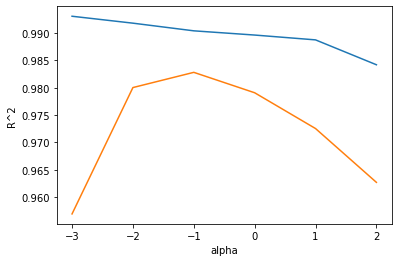

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# alpha = 0.1이 최적임.
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

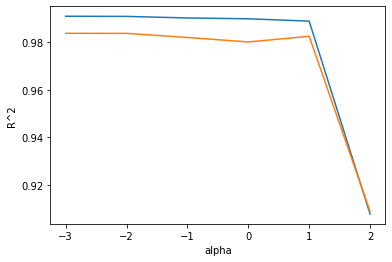

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
#계수를 0으로 만드는 계수값(coef_)는 몇개?
print(np.sum(lasso.coef_ == 0)) # 40개는 필요없음!

40
